In [2]:
!pip install ISLP


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: C:\Users\cluu0\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [40]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize, poly)
import matplotlib.pyplot as plt
import altair as alt

ModuleNotFoundError: No module named 'ISLP'

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv('car_prices.csv', on_bad_lines = 'warn')

b'Skipping line 408163: expected 16 fields, saw 17\nSkipping line 417837: expected 16 fields, saw 17\nSkipping line 421291: expected 16 fields, saw 17\nSkipping line 424163: expected 16 fields, saw 17\n'
b'Skipping line 427042: expected 16 fields, saw 17\nSkipping line 427045: expected 16 fields, saw 17\nSkipping line 434426: expected 16 fields, saw 17\nSkipping line 444503: expected 16 fields, saw 17\nSkipping line 453796: expected 16 fields, saw 17\n'
b'Skipping line 461599: expected 16 fields, saw 17\nSkipping line 461614: expected 16 fields, saw 17\n'
b'Skipping line 492486: expected 16 fields, saw 17\nSkipping line 497010: expected 16 fields, saw 17\nSkipping line 497013: expected 16 fields, saw 17\nSkipping line 499085: expected 16 fields, saw 17\nSkipping line 501457: expected 16 fields, saw 17\nSkipping line 505301: expected 16 fields, saw 17\nSkipping line 505308: expected 16 fields, saw 17\nSkipping line 520463: expected 16 fields, saw 17\n'
b'Skipping line 528998: expected 1

In [4]:
df['color'].unique()

array(['white', 'gray', 'black', 'red', 'silver', 'blue', 'brown',
       'beige', 'purple', 'burgundy', '—', 'gold', 'yellow', 'green',
       'charcoal', nan, 'orange', 'off-white', 'turquoise', 'pink',
       'lime'], dtype=object)

In [5]:
df = df.drop(['model', 'vin', 'trim', 'state', 'interior', 'seller', 'mmr', 'saledate'], axis=1)

In [6]:
df = df.dropna(subset = ["year", "condition", "odometer", "sellingprice", "make", "transmission", "body", "color"])

make_dummies = pd.get_dummies(df['make'], prefix_sep='_', prefix='make')
transmission_dummies = pd.get_dummies(df['transmission'], prefix_sep='_', prefix='transmission')
body_dummies = pd.get_dummies(df['body'], prefix_sep='_', prefix='body')
color_dummies = pd.get_dummies(df['color'], prefix_sep='_', prefix='color')

df = pd.concat([df, make_dummies, transmission_dummies, body_dummies, color_dummies], axis=1)

df.shape

(472424, 168)

In [7]:
df.columns

Index(['year', 'make', 'body', 'transmission', 'condition', 'odometer',
       'color', 'sellingprice', 'make_Acura', 'make_Aston Martin',
       ...
       'color_off-white', 'color_orange', 'color_pink', 'color_purple',
       'color_red', 'color_silver', 'color_turquoise', 'color_white',
       'color_yellow', 'color_—'],
      dtype='object', length=168)

In [8]:
features = ['year', 'condition', 'odometer'] + list(make_dummies.columns) + list(transmission_dummies.columns) + list(body_dummies.columns) + list(color_dummies.columns)
spec = MS(features).fit(df)
x = spec.transform(df)
y = df['sellingprice']

NameError: name 'MS' is not defined

In [ ]:
model1 = sm.OLS(y, x)
results = model1.fit()

In [ ]:
results.rsquared

0.6984318445736043

In [ ]:
summarize(results)

,coef,std err,t,P>|t|
intercept,-1.200000e+06,4483.792,-267.706,0.0
year,9.571945e+02,3.527,271.410,0.0
condition,1.732861e+03,10.299,168.259,0.0
odometer,-4.190000e-02,0.000,-169.371,0.0
make_Acura,-3.108000e+04,190.297,-163.342,0.0
...,...,...,...,...
color_silver,-6.074000e+04,242.731,-250.233,0.0
color_turquoise,-6.103000e+04,436.392,-139.858,0.0
color_white,-6.003000e+04,243.555,-246.470,0.0
color_yellow,-5.834000e+04,283.559,-205.741,0.0


from matplotlib import pyplot as plt
_df_0['coef'].plot(kind='hist', bins=20, title='coef')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['std err'].plot(kind='hist', bins=20, title='std err')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['t'].plot(kind='hist', bins=20, title='t')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['P>|t|'].plot(kind='hist', bins=20, title='P>|t|')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='coef', y='std err', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='std err', y='t', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='t', y='P>|t|', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['t']
  ys = series['coef']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('t', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('t')
_ = plt.ylabel('coef')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['t']
  ys = series['std err']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('t', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('t')
_ = plt.ylabel('std err')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['t']
  ys = series['P>|t|']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('t', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('t')
_ = plt.ylabel('P>|t|')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['t']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 't'}, axis=1)
              .sort_values('t', ascending=True))
  xs = counted['t']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('t', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('t')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_11['coef'].plot(kind='line', figsize=(8, 4), title='coef')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['std err'].plot(kind='line', figsize=(8, 4), title='std err')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['t'].plot(kind='line', figsize=(8, 4), title='t')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['P>|t|'].plot(kind='line', figsize=(8, 4), title='P>|t|')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
column_names = df.columns
df_new = pd.DataFrame(columns = column_names)
df_new = df_new.drop(['sellingprice'], axis=1)
zeros_list = [0] * 160


# predicting based off input data
df_new.loc[0] = [2007, 'Bsfs', 'Sedan', 'automatic', 3.0, 116000, 'gray'] + zeros_list
df_new.loc[0, 'make_BMW'] = 1
df_new.loc[0, 'color_beige'] = 1
df_new.loc[0, 'body_Sedan'] = 1
df_new.loc[0, 'transmission_automatic'] = 1

In [ ]:
# prints prediction
new_X = spec.transform(df_new)
results.get_prediction(new_X).predicted_mean

array([14196.21676379])

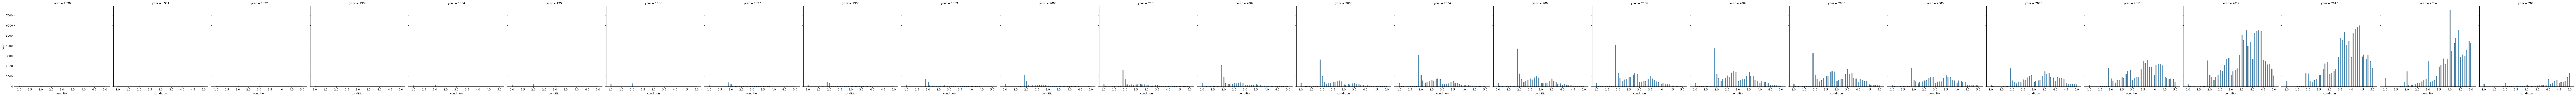

In [ ]:
sns.displot(data = df, x = 'condition', col = 'year')

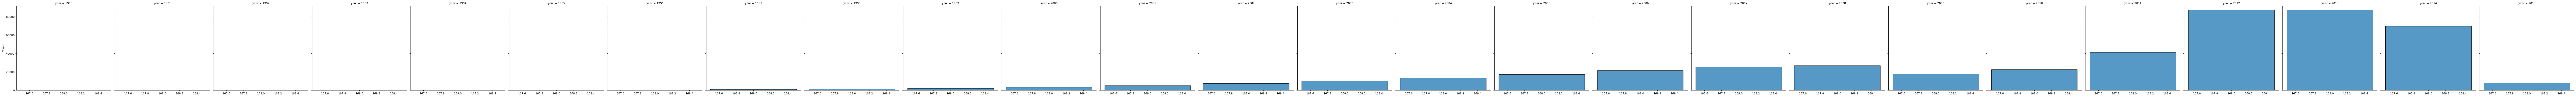

In [ ]:
sns.displot(data = df, x = len(df.columns) ,col = 'year')

<Axes: xlabel='year', ylabel='condition'>

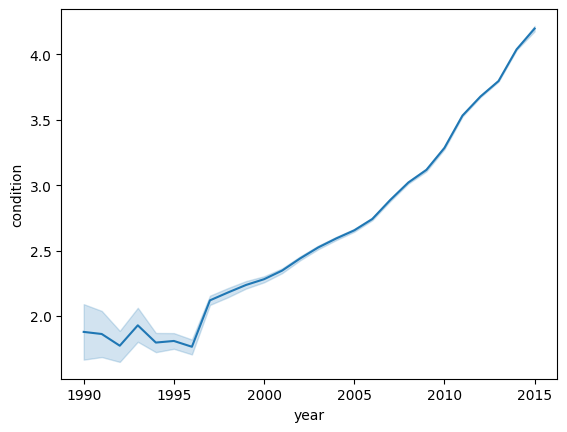

In [ ]:
sns.lineplot(data = df, x = 'year', y = 'condition')

In [ ]:
def plot_lines(x_input, y_input):
    fig = plt.figure(figsize = (10, 4))
    sns.lineplot(data = df, x = x_input, y = y_input)
    sns.set(rc={'axes.facecolor': '#0d1118', 'figure.facecolor': '#0d1118', 'axes.labelcolor': 'white', 'text.color': 'white', 'xtick.color': 'white', 'ytick.color': 'white'})
    fig.show()

def plotBarColorGraph():
    color_counts = df['color'].value_counts()

    fig, ax = plt.subplots()

    sns.barplot(x=color_counts.index, y=color_counts.values, ax = ax)

    ax.set_xlabel('Color')
    ax.set_ylabel('Number of Cars')
    ax.set_title('Number of Cars per Color')
    plt.xticks(rotation=45)
    plt.tight_layout()
    fig.show()

def plotAutoManual():
    transmission_counts = df['transmission'].value_counts()
    fig, ax = plt.subplots()

    sns.barplot(x=transmission_counts.index, y=transmission_counts.values, ax = ax)

    ax.set_xlabel('Type of Transmission')
    ax.set_ylabel('Number of Carss')
    ax.set_title('Automatic vs Manual Transmission')
    plt.xticks(rotation=45)
    plt.tight_layout()
    fig.show()

def plotTransmissionCost():
    sns.scatterplot(data=df, x='year', y='sellingprice', hue='transmission', style='transmission')
    plt.xlabel('Year')
    plt.ylabel('Price')
    plt.title('Price Comparison of Manual vs Automatic Cars')
    plt.tight_layout()
    plt.gca().set_aspect('auto')

    min_year = df['year'].min()
    max_year = df['year'].max()
    x_range = max_year - min_year
    plt.xlim(min_year - 0.1 * x_range, max_year + 0.1 * x_range)

    plt.gcf().show()


In [ ]:
plot_lines('year', 'condition')

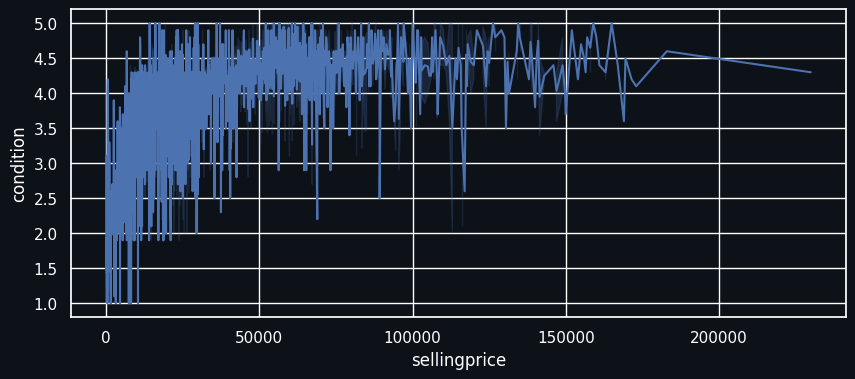

In [ ]:
plot_lines('sellingprice', 'condition')

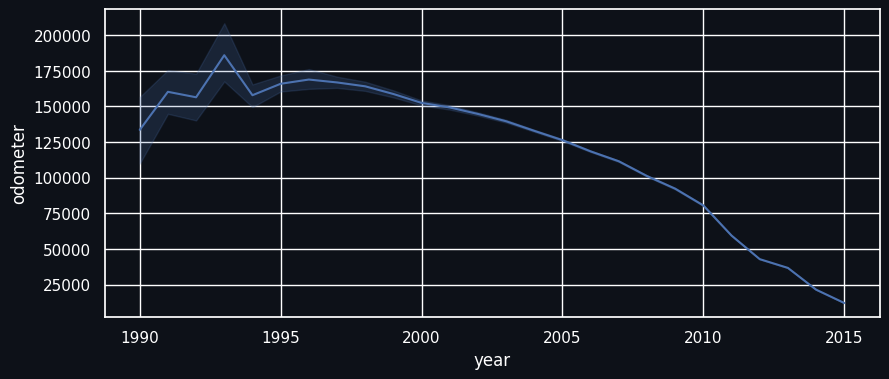

In [ ]:
plot_lines('year', 'odometer')

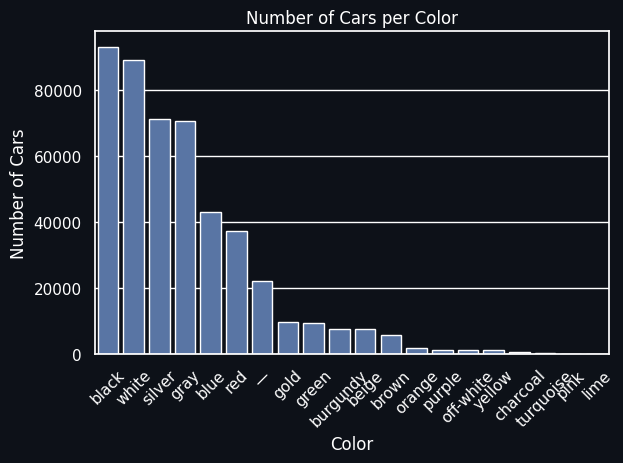

In [ ]:
plotBarColorGraph()

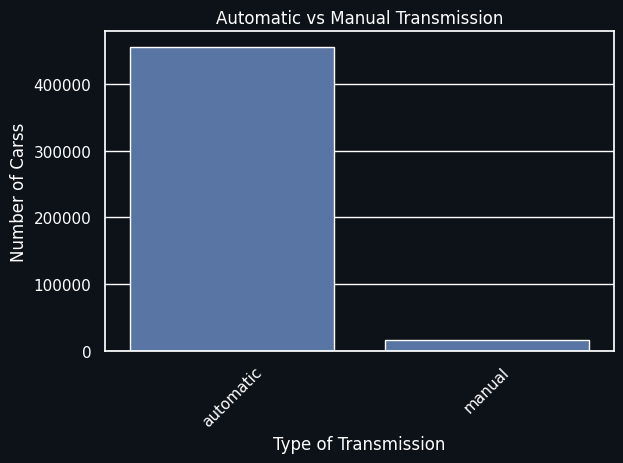

In [ ]:
plotAutoManual()

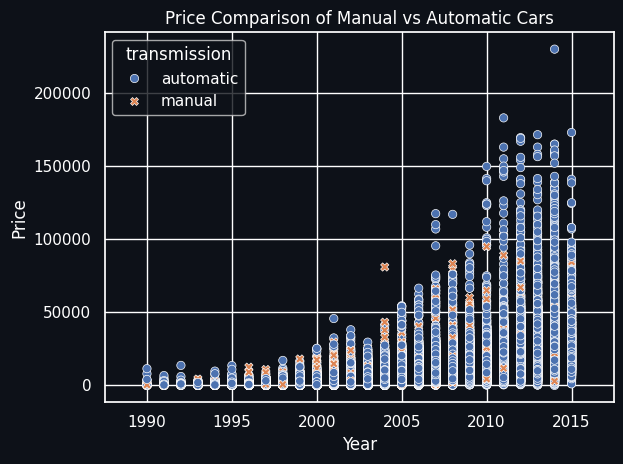

In [ ]:
plotTransmissionCost()

Overall, lots of the data makes a ton of sense. For example, in terms of pure coefficient strength, year, odometer, and condition. Similarly, when someone looks for a car, typically they look for the mileage, the condition it is in, and how old the car is as a starting point. I think this is a good sign since it meant that our model found the same factors to be important as a normal person would when looking at a car. However, there was definitely some very interesting points about the data that showcased certain trends. For example, it was able to get a general understanding of what car companies are considered as higher value brands such as BMW, compared lower value brands such as a honda or toyota. Overal, I found that the most interesting fact was that color has a fairly noticeable impact on price, yet most people when looking at cars don't exaclty consider it to be much of a number mover compared to the usual mileage and years. Another interesting tidbit was that manual and transmission had extremely similar coefficients, indicating that they don't have as much of an effect on value as people may presume. I think this is mainly due to the sheer limited number of manual cars along with their specialty markets in the sports car industry being fairly small, meaning overall only a very small part of the car community cares all that much. Finally, after playing around with the predictions, I found that it was fairly accurated in the more common types of cars like a honda civic in a sweetspot of around 1990 - 2010 for the year. Outside of this range and with more exotic makes and colors, the predictions tend to get very out there. This is probably due to the lack of data for those outer extremes. In summary, the project ended up teaching me a lot about which factors get prioritized over others in the car market, along with general benefits and drawbacks of this type of machine learning. While it was fairly easy to get the ball rolling and set up, it quickly ran into a wall for it to grow further.